<a href="https://www.kaggle.com/code/bhaktipatil25/nlp-classification?scriptVersionId=134357104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


### **Importing Necessary Library**

In [2]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
palette=sns.color_palette('tab10')
sns.set(palette=palette)
# from nltk.stem import WordNetLemmatizer
# import nltk
# from nltk.corpus import stopword
# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.externals import joblib
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
from IPython.display import HTML, display
# Plotting libraries
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### **Data Collection**

In [3]:

data=pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding="latin-1")
test_data=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin-1')

### **Explorating of Data**

In [4]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
print(data.shape)
print(data.columns)

(41157, 6)
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [6]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
print(test_data.shape)
print(test_data.columns)

(3798, 6)
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

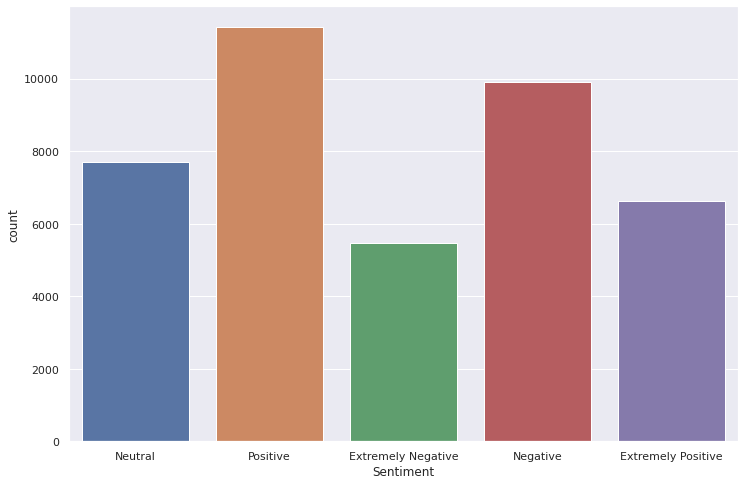

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Sentiment", data = data)

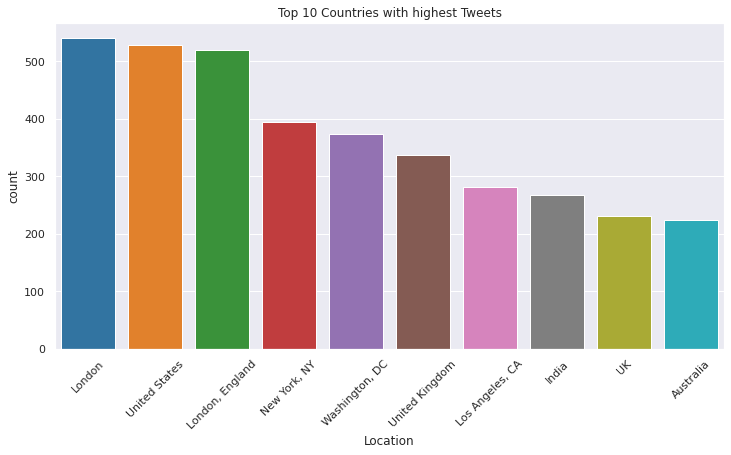

In [11]:
#Top 10 Countries that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=data, order=data['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

In [12]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [13]:
data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [14]:
test_data['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [15]:
test_data['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

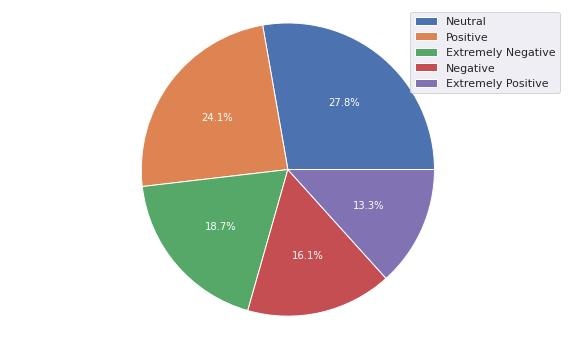

In [16]:
plt.figure(figsize=(10,6))
plt.pie(data['Sentiment'].value_counts(), labels=data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

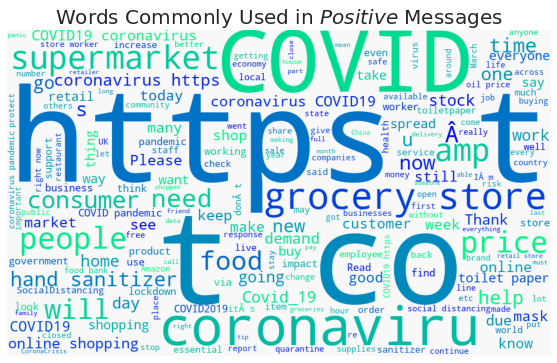

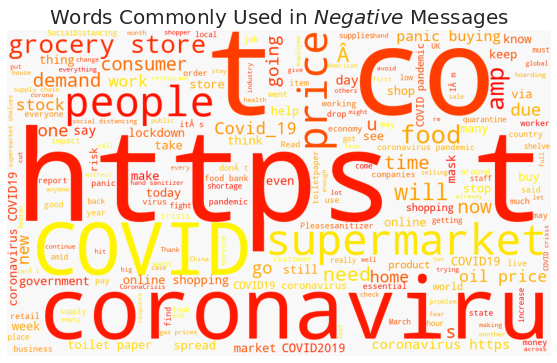

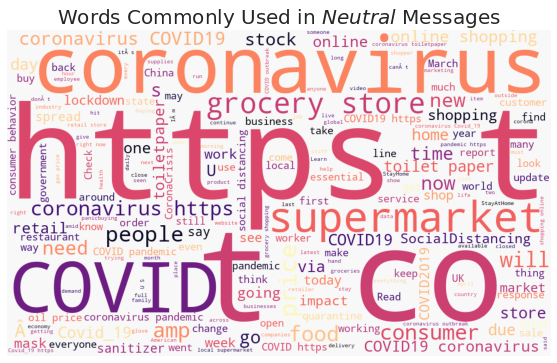

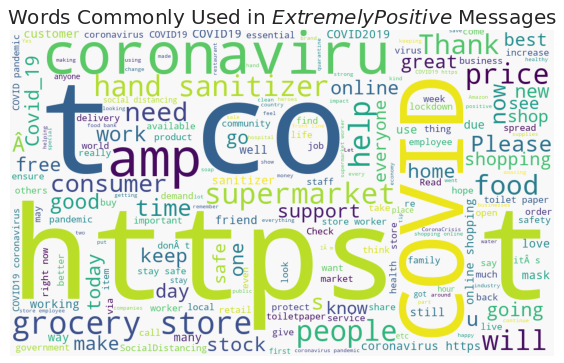

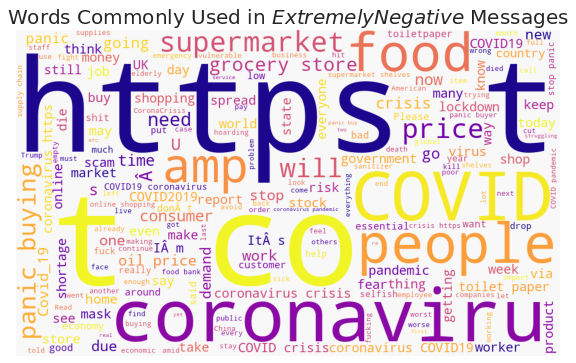

In [17]:
#WordCloud for the Sentiments
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = data.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [18]:
#Only intrested in the OriginalTweet and Sentiment Columns
train_df= data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### **Preprocessing**

In [19]:
#Checking for null values
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [20]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [21]:
#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])

train_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


### **Train Test Spilt**

In [22]:
X_trains = train_df["OriginalTweet"]
y_trains = train_df['SentimentMapped']
# y_trains = train_df['Sentiment']
X_tests = test_df["OriginalTweet"]
y_tests = test_df['SentimentMapped']
# y_tests = test_df['Sentiment']
X_trains.shape,X_tests.shape,y_trains.shape

((41157,), (3798,), (41157,))

### **Trying out NBclassfier**


In [23]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [24]:
model = clf.fit(X_trains,y_trains)

In [25]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_trains,y_trains)))

Accuracy of Naive Bayes Classifier is 0.7390966299778895


In [26]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_tests,y_tests)))

Accuracy of Naive Bayes Classifier is 0.627172195892575


### **Hyperparameter Tuning for NBClassifier**

In [27]:
model.get_params(deep=True)

{'memory': None,
 'steps': [('vect', CountVectorizer(stop_words='english')),
  ('tfidf', TfidfTransformer()),
  ('classifier', MultinomialNB())],
 'verbose': False,
 'vect': CountVectorizer(stop_words='english'),
 'tfidf': TfidfTransformer(),
 'classifier': MultinomialNB(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': 'english',
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'classifier__alpha': 1.0,
 'classifier__class_prior': None,
 'classifier__fit_prior': True}

In [28]:
param_grid={"classifier__alpha": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100 ]}

In [29]:
grid_search = GridSearchCV(clf,param_grid, cv=3, return_train_score=True)
grid_search.fit(X_trains, y_trains)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                               0.7, 0.8, 0.9, 1, 10, 100]},
             return_train_score=True)

In [30]:
grid_search.best_params_

{'classifier__alpha': 0.2}

In [31]:
grid_search.best_score_

0.6274752775955487

### **Trying Out XGBoost**

In [32]:
from xgboost import XGBClassifier

In [33]:
# Building Pipeline for raw text transformation

clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier',XGBClassifier())
    ])

In [34]:
model = clf.fit(X_trains,y_trains)

In [35]:
print("Accuracy of XGBoost Classifier is {}".format(model.score(X_trains,y_trains)))

Accuracy of XGBoost Classifier is 0.8097043030347207


In [36]:
print("Accuracy of XGBoost Classifier is {}".format(model.score(X_tests,y_tests)))

Accuracy of XGBoost Classifier is 0.7303844128488678


### **XGBoost with parameter**

In [37]:
# Building Pipeline for raw text transformation

clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier',XGBClassifier(eta=0.3,reg_alpha=1e-05))
    ])

In [38]:
model = clf.fit(X_trains,y_trains)

In [39]:
print("Accuracy of XGBoost Classifier is {}".format(model.score(X_trains,y_trains)))

Accuracy of XGBoost Classifier is 0.8097043030347207


In [40]:
print("Accuracy of XGBoost Classifier is {}".format(model.score(X_tests,y_tests)))

Accuracy of XGBoost Classifier is 0.7303844128488678


### **Hyperparameter Tuning for XGBoost**

In [41]:
print(model.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.3,
                               eval_metric=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                          

In [42]:
# 
param_grid={"classifier__eta":[0.3,0.8,0.9,1.2],
 "classifier__reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
#            "classifier__reg_lamda":[0,1,
           }

In [43]:
grid_search = GridSearchCV(clf,param_grid, cv=3, return_train_score=True)
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eta=0.3, eval_metric=None,
                                                   

In [44]:
grid_search.best_params_

{'classifier__eta': 0.3, 'classifier__reg_alpha': 1e-05}

In [45]:
grid_search.best_score_

0.7334110843841873

### **Trying out Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
    ])

In [48]:
model = clf.fit(X_trains,y_trains)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
print("Accuracy of Logistic Regression is {}".format(model.score(X_trains,y_trains)))

Accuracy of Logistic Regression is 0.9142551692300216


In [50]:
print("Accuracy of Logistic Regression is {}".format(model.score(X_tests,y_tests)))

Accuracy of Logistic Regression is 0.7767245918904687


### **Conclusion**
1. Using Navy Bayes Classifier algorithm accuracy with 
   train data is **73.90** and 
   test data  is **62.74**
2. Using XGBoost Classifier algorithm accuracy with 
   train data is **80.97** and 
   test data  is **73.03**
3. Using Logistic Regression  algorithm accuracy with 
   train data is **91.42** and 
   test data  is **77.67**